#Link to Google Drive & GitHub


In [0]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Clone github repository setup
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/Twump'
# replace with your Github username 
GIT_USERNAME = "sami12rom" 
# definitely replace with your
GIT_TOKEN = "TOKEN"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "TwitterNLP" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path 
!mkdir "{PROJECT_PATH}"    

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive/My Drive/Colab Notebooks/Twump
mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/Twump’: File exists
GIT_PATH:  https://feb1339ef41c3563c071ed36b88da8198847d189@github.com/sami12rom/TwitterNLP.git


In [0]:
%cd "{PROJECT_PATH}"
!git clone "{GIT_PATH}" #clone the github repository



/content/drive/My Drive/Colab Notebooks/Twump
Cloning into 'TwitterNLP'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [0]:
%cd "{PROJECT_PATH}/TwitterNLP"
!git branch

/content/drive/My Drive/Colab Notebooks/Twump/TwitterNLP
* master


In [0]:
!git checkout master

M	1.ipynb
Already on 'master'
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)


#Analysis

In [0]:
import pandas as pd
import numpy as np
import collections
import datetime

# Loading data
import io
from google.colab import files

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [0]:
url = 'https://raw.githubusercontent.com/sami12rom/TwitterNLP/master/trumptweets.csv'
df = pd.read_csv(url)
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [0]:
df = df.sort_values(by='date', ascending=False)
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
41121,1219076533354037249,https://twitter.com/realDonaldTrump/status/121...,A great show! Check it out tonight at 9pm. @ F...,2020-01-20 02:57:49,7947,34902,@,NaN,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN


In [0]:
#Most Tweeted
print(df.sort_values(by='retweets', ascending=False)['content'].iloc[0])
print('Date & Time: ' ,df.sort_values(by='retweets', ascending=False)['date'].iloc[0])
print('Retweeted: ' ,df.sort_values(by='retweets', ascending=False)['retweets'].iloc[0])



# FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg
Date & Time:  2017-07-02 15:21:42
Retweeted:  309892
Mean of Retweets:  5455.590657069209
Count of Retweets:  41122.0
Max of Retweets:  309892.0


In [0]:
#Info on Retweets

print('Mean of Retweets: ', df.describe()['retweets'][1])
print('Count of Retweets: ', df.describe()['retweets'][0])
print('Max of Retweets: ', df.describe()['retweets'][7])


Mean of Retweets:  5455.590657069209
Count of Retweets:  41122.0
Max of Retweets:  309892.0


,id,retweets,favorites,geo
count,4.112200e+04,41122.000000,41122.000000,0.0
mean,6.088909e+17,5455.590657,22356.899105,NaN
std,3.027946e+17,10130.076661,41501.859711,NaN
min,1.698309e+09,0.000000,0.000000,NaN
25%,3.549428e+17,25.000000,28.000000,NaN
50%,5.609149e+17,291.000000,247.000000,NaN
75%,7.941218e+17,8778.000000,32970.750000,NaN
max,1.219077e+18,309892.000000,857678.000000,NaN


In [0]:
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
41121,1219076533354037249,https://twitter.com/realDonaldTrump/status/121...,A great show! Check it out tonight at 9pm. @ F...,2020-01-20 02:57:49,7947,34902,@,NaN,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN


In [0]:

new = df['date'].str.split(" ", n = 1, expand=True)
df = df.rename(columns={'date': 'datetime'})
df["datetime"] = df['datetime'].astype('datetime64')

#df.drop(columns='date', inplace=True)
df['time'] = new[1]
df['date'] = new[0]
new = df['date'].str.split("-", n=2, expand=True)
df['year'] = new[0]
df['month'] = new[1]
df['day'] = new[2]
df["date"] = df['date'].astype('datetime64')
df['dayofweek'] = df['datetime'].apply(lambda time: time.dayofweek)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x > 4 else 0)
df['partofday'] = df['datetime'].apply(lambda time: 'morning' if 6<= time.hour <= 11 else ('afternoon' if 11< time.hour <= 17 else 'night'))
df.head()

,id,link,content,datetime,retweets,favorites,mentions,hashtags,geo,time,date,year,month,day,dayofweek,weekend,partofday
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,20:54:25,2009-05-04,2009,05,04,0,0,night
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,03:00:10,2009-05-05,2009,05,05,1,0,night
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,15:38:08,2009-05-08,2009,05,08,4,0,afternoon
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,22:40:15,2009-05-08,2009,05,08,4,0,night
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,16:07:28,2009-05-12,2009,05,12,1,0,afternoon


In [0]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 13 columns):
id           41122 non-null int64
link         41122 non-null object
content      41122 non-null object
retweets     41122 non-null int64
favorites    41122 non-null int64
mentions     22467 non-null object
hashtags     5810 non-null object
geo          0 non-null float64
time         41122 non-null object
date         41122 non-null datetime64[ns]
year         41122 non-null object
month        41122 non-null object
day          41122 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 4.1+ MB


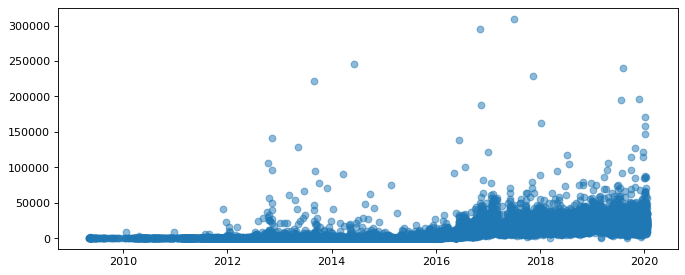

In [0]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(df['date'],df['retweets'], alpha=0.5)
#plt.scatter(df['date'],df['favorites'], alpha=0.5)

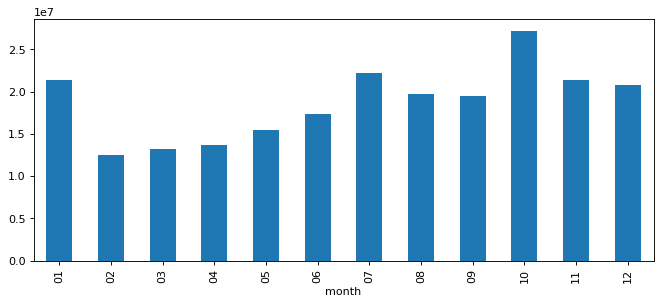

In [0]:
plt.figure(figsize=(10, 4), dpi=80)
year = df.groupby(df["date"].dt.year).count()['content']
month = df.groupby(df["date"].dt.month).count()['content']
days = df.groupby(df["date"].dt.day).count()['content']
weekends = df.groupby(df["weekend"]).count()['content']
timeofday = df.groupby(df["partofday"]).count()['content']
weekdays = df.groupby(df["dayofweek"]).count()['content']

retweets = df.groupby(df["month"]).sum()['retweets']

retweets.plot(kind='bar')

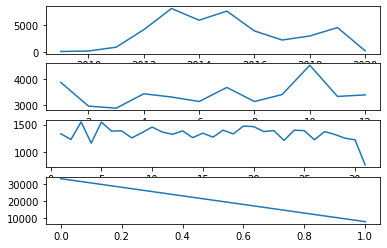

In [0]:
fig, axs = plt.subplots(4)
axs[0].plot(year)
axs[1].plot(month)
axs[2].plot(days)


In [0]:
df.head()

,id,link,content,retweets,favorites,mentions,hashtags,geo,time,date,year,month,day
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,500,868,NaN,NaN,NaN,20:54:25,2009-05-04,2009,05,04
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,33,273,NaN,NaN,NaN,03:00:10,2009-05-05,2009,05,05
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,12,18,NaN,NaN,NaN,15:38:08,2009-05-08,2009,05,08
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,11,24,NaN,NaN,NaN,22:40:15,2009-05-08,2009,05,08
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",1399,1965,NaN,NaN,NaN,16:07:28,2009-05-12,2009,05,12


In [0]:

df.head()

,id,link,content,retweets,favorites,mentions,hashtags,geo,time,date,year,month,day,DayofWeek
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,500,868,NaN,NaN,NaN,20:54:25,2009-05-04,2009,05,04,0
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,33,273,NaN,NaN,NaN,03:00:10,2009-05-05,2009,05,05,1
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,12,18,NaN,NaN,NaN,15:38:08,2009-05-08,2009,05,08,4
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,11,24,NaN,NaN,NaN,22:40:15,2009-05-08,2009,05,08,4
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",1399,1965,NaN,NaN,NaN,16:07:28,2009-05-12,2009,05,12,1


#Preprocessing

In [0]:
oldtweets = df[['id','date','content','retweets','favorites']].sort_values(by='date', ascending=False)
oldtweets.head()

,id,date,content,retweets,favorites
41121,1219076533354037249,2020-01-20,A great show! Check it out tonight at 9pm. @ F...,7947,34902
41120,1219066007731310593,2020-01-20,"“In the House, the President got less due proc...",20599,81921
41119,1219053709428248576,2020-01-20,I was thrilled to be back in the Great State o...,16588,66944
41118,1219004689716412416,2020-01-19,Now Mini Mike Bloomberg is critical of Jack Wi...,36239,149571
41117,1218962544372670467,2020-01-19,I have never seen the Republican Party as Stro...,32620,213817


In [0]:
def standardize_text(df, text_field):
    # normalize by turning all letters into lowercase
    df[text_field] = df[text_field].str.lower()
    return df


# call the text cleaning function
cleantext = standardize_text(oldtweets, "content")

In [0]:
## [PREPROCESS] Tokenize

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

cleantext["tokens"] = cleantext["content"].apply(tokenizer.tokenize)

cleantext.head()

,id,date,content,retweets,favorites,tokens
41121,1219076533354037249,2020-01-20,a great show! check it out tonight at 9pm. @ f...,7947,34902,"[a, great, show, check, it, out, tonight, at, ..."
41120,1219066007731310593,2020-01-20,"“in the house, the president got less due proc...",20599,81921,"[in, the, house, the, president, got, less, du..."
41119,1219053709428248576,2020-01-20,i was thrilled to be back in the great state o...,16588,66944,"[i, was, thrilled, to, be, back, in, the, grea..."
41118,1219004689716412416,2020-01-19,now mini mike bloomberg is critical of jack wi...,36239,149571,"[now, mini, mike, bloomberg, is, critical, of,..."
41117,1218962544372670467,2020-01-19,i have never seen the republican party as stro...,32620,213817,"[i, have, never, seen, the, republican, party,..."


In [0]:
#!pip install nltk

In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [0]:
#Lemmatizing
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text
  

#Stemming
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

table = cleantext
#table['processed'] = table['tokens'].apply(lambda x: stemming(x))
table['processed'] = table['tokens'].apply(lambda x: lemmatizing(x))
table.head()

,id,date,content,retweets,favorites,tokens,processed
41121,1219076533354037249,2020-01-20,a great show! check it out tonight at 9pm. @ f...,7947,34902,"[a, great, show, check, it, out, tonight, at, ...","[a, great, show, check, it, out, tonight, at, ..."
41120,1219066007731310593,2020-01-20,"“in the house, the president got less due proc...",20599,81921,"[in, the, house, the, president, got, less, du...","[in, the, house, the, president, got, le, due,..."
41119,1219053709428248576,2020-01-20,i was thrilled to be back in the great state o...,16588,66944,"[i, was, thrilled, to, be, back, in, the, grea...","[i, wa, thrilled, to, be, back, in, the, great..."
41118,1219004689716412416,2020-01-19,now mini mike bloomberg is critical of jack wi...,36239,149571,"[now, mini, mike, bloomberg, is, critical, of,...","[now, mini, mike, bloomberg, is, critical, of,..."
41117,1218962544372670467,2020-01-19,i have never seen the republican party as stro...,32620,213817,"[i, have, never, seen, the, republican, party,...","[i, have, never, seen, the, republican, party,..."


In [0]:
all_words = [word for tokens in cleantext["processed"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in cleantext["processed"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

861469 words total, with a vocabulary size of 45567


In [0]:
print (VOCAB[0:100])

# What are the most commonly occuring words
from collections import Counter
count_all_words = Counter(all_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

In [0]:
unwantedwords='!@#"', 'realDonaldTrump','realdonaldtrump', 'Donald', '.', '&', '-', 'A', '"', 'the', '','com', 'http'
clean_words=all_words
for char in unwantedwords:
    clean_words = [w.replace(char,"") for w in clean_words]

count_all_words = Counter(clean_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

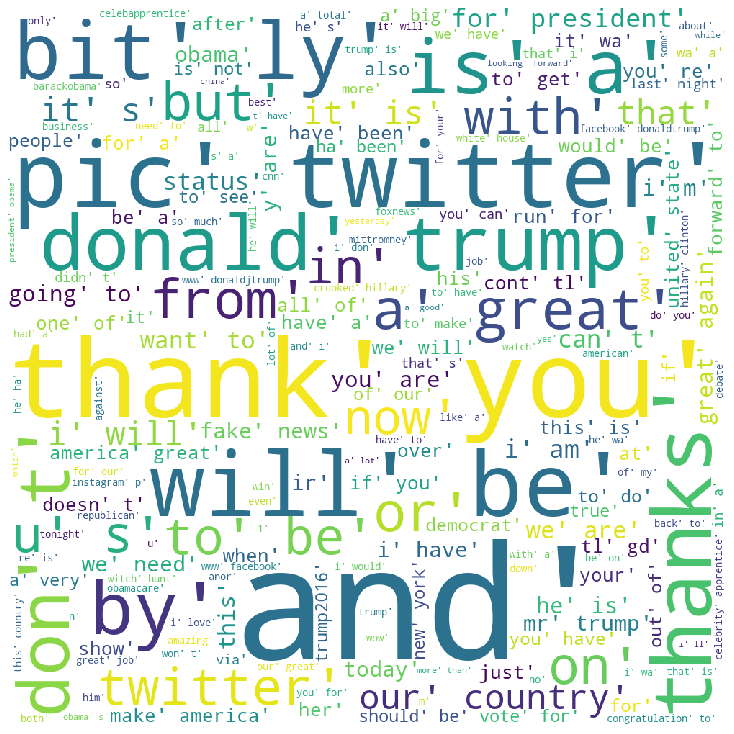

In [0]:
stopwords = set(STOPWORDS)
wordcloud=WordCloud(width=1000,height=1000, background_color='white', stopwords=stopwords,min_font_size=10).generate(str(clean_words))
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [0]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = clean_words

clean_tokens = [token for token in clean_tokens if token not in sr]
clean_tokens = [token for token in clean_tokens if token]
#for token in clean_words:
    #if token in sr:
        #clean_tokens.remove(token)
clean_tokens

![](https://drive.google.com/uc?id=1Z2Sr70L-Dj_JNGHlnV-WLGlfPigt-8pW)

In [0]:
tagged = nltk.pos_tag(clean_tokens)
tagged[0:10]

In [0]:
freq = nltk.FreqDist(clean_tokens)
freqtable = list(freq.items())
print(type(freqtable))
freqtable = pd.DataFrame(data=freqtable, columns=['word','freq'])
freqtable['tag'] = (nltk.pos_tag(freqtable['word']))
freqtable['tag'] = [str(i) for i in freqtable['tag'].str[1]]
freqtable = freqtable.sort_values(by='freq',ascending=False)
print(freqtable.head())
#freqtable = [str(key) + ':' + str(val) for key,val in freq.items()]
#freqtable = pd.DataFrame(data=freqtable, columns=['word'])
#freqtable['freq']=freqtable['word'].str.split(':').str[1]
#freqtable['word']=freqtable['word'].str.split(':').str[0]
#freqtable.head()
#print(freqtable[0:6])
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='char_wb')
X_counts = count_vect.fit_transform(freqtable['word'])
print(X_counts.shape)
print(count_vect.get_feature_names())

In [334]:
%cd "{PROJECT_PATH}/TwitterNLP"

[Errno 2] No such file or directory: '{PROJECT_PATH}/TwitterNLP'
/content


In [0]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git add .

In [0]:
!git commit -m '"delete temp folder"'
!git config --global user.email "sami.alashabi@gmail.com"
!git config --global user.name "sami12rom"

[master b2f8337] "delete temp folder"
 1 file changed, 1 insertion(+), 510 deletions(-)
 rewrite 1.ipynb (98%)


In [0]:
!git push origin master

fatal: could not read Password for 'https://feb1339ef41c3563c071ed36b88da8198847d189@github.com': No such device or address
